# Lets compare some stocks performance

Based on DataCamp course: <a href="https://www.datacamp.com/courses/manipulating-time-series-data-in-python"> Manipulating Time Series Data in Python </a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
#%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 6]

In first version we will read data from local directory data/. Just put there some historical data in CSV format. File name is taken as ticker. You can get historical data from Yahoo Finance (https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC)

In [2]:
%%time
failinimed=os.listdir("data/")
print('Alltogether ', len(failinimed), 'tickers:')
print('________________')
prices_origin=pd.DataFrame()
for nimi in failinimed:
    tikker=pd.read_csv('data/'+nimi, parse_dates=['Date'], index_col='Date')
    print(nimi,'->',nimi.replace('.csv',''),tikker.index[0],'-',tikker.index[-1])
    if prices_origin.shape==(0,0):
        prices_origin=pd.DataFrame(tikker.Close)
        prices_origin.rename(columns={'Close':nimi.replace('.csv','')}, inplace=True)
    else:
        prices_origin=pd.concat([prices_origin, tikker.Close], axis=1)
        prices_origin.rename(columns={'Close':nimi.replace('.csv','')}, inplace=True)
del tikker, failinimed, nimi
print('________________')

Alltogether  5 tickers:
________________
DJI.csv -> DJI 1985-01-29 00:00:00 - 2019-01-15 00:00:00
GE.csv -> GE 1962-01-02 00:00:00 - 2019-01-15 00:00:00
SIE.csv -> SIE 1996-11-08 00:00:00 - 2019-01-14 00:00:00
SP500.csv -> SP500 1950-01-03 00:00:00 - 2019-01-15 00:00:00
TNK.csv -> TNK 2007-12-13 00:00:00 - 2019-01-15 00:00:00
________________
Wall time: 159 ms


In [3]:
pd.concat([prices_origin.head(3),prices_origin.tail(3)])

,DJI,GE,SIE,SP500,TNK
Date,,,,,
1950-01-03,NaN,NaN,NaN,16.660000,NaN
1950-01-04,NaN,NaN,NaN,16.850000,NaN
1950-01-05,NaN,NaN,NaN,16.930000,NaN
2019-01-11,23995.949219,8.94,97.529999,2596.260010,1.04
2019-01-14,23909.839844,8.90,97.349998,2582.610107,1.03
2019-01-15,24065.589844,8.73,NaN,2610.300049,1.02


In [4]:
prices_origin.describe()

,DJI,GE,SIE,SP500,TNK
count,8561.000000,14358.000000,5656.000000,17371.000000,2791.000000
mean,9358.129881,12.748695,76.069250,569.921849,6.457488
std,5929.395574,14.036179,29.876625,677.881458,5.075241
min,1242.050049,0.578125,23.303200,16.660000,0.910000
25%,3544.780029,1.138021,55.576250,85.875000,2.680000
50%,9814.660156,5.291667,71.974651,166.259995,4.350000
75%,12354.349609,24.597500,94.152651,1094.815002,9.330000
max,26828.390625,60.000000,185.578995,2930.750000,24.299999


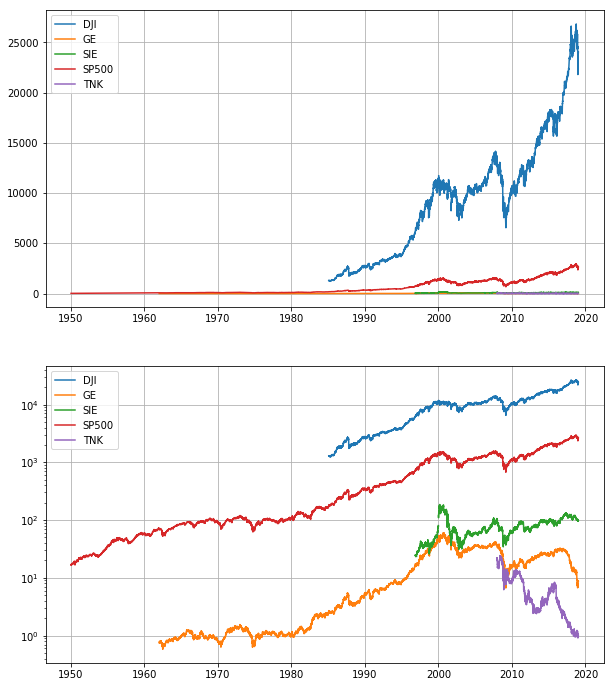

In [5]:
plt.figure(figsize=(10,12), num=1)
plt.subplot(211)
plt.plot(prices_origin)
plt.legend(prices_origin.columns)
plt.grid(True)
plt.subplot(212)
plt.semilogy(prices_origin)
plt.grid(True)
plt.legend(prices_origin.columns)
plt.show()

In [6]:
#prices_origin.plot(logy=True, grid=True)

***
# Set your starting timepoint here!
### And your tickers of interest
***

In [7]:
starttime='2003-1-1'
print('Available tickers:',prices_origin.columns.tolist())
ticker=['SIE','SP500']

#Set your moving average [days]
ma='7D' #default='1D'

Available tickers: ['DJI', 'GE', 'SIE', 'SP500', 'TNK']


In [8]:
ticker=['GE', 'SIE','DJI'] #preferrebly stock tikker in first place and and index in last place

***

In [9]:
prices=prices_origin[starttime:][ticker]
pd.concat([prices.head(2),prices.tail(2)])

,GE,SIE,DJI
Date,,,
2003-01-01,NaN,39.245701,NaN
2003-01-02,25.48,42.928001,8607.519531
2019-01-14,8.90,97.349998,23909.839844
2019-01-15,8.73,NaN,24065.589844


#### Graphical overview

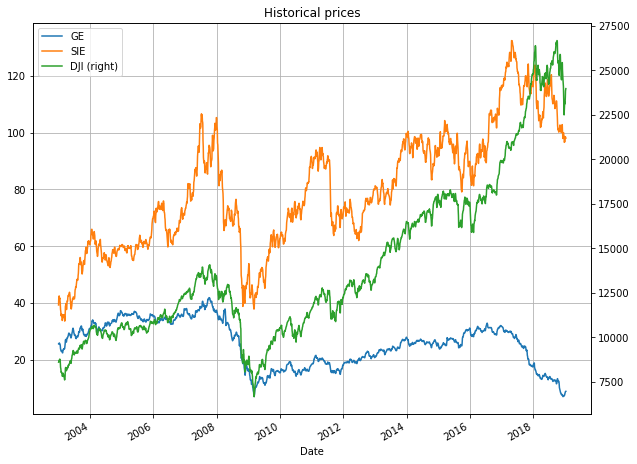

In [10]:
#%matplotlib notebook
#plt.figure(figsize=(8,7), num=2)
#plt.plot(prices.rolling(ma).mean(),)
prices.rolling(ma).mean().plot(secondary_y=ticker[-1], title='Historical prices', grid=True, figsize=(10,8));


#### If this is dificult to visualize, we could normalize prices...

In [11]:
#normalized=prices.div(prices.iloc[0])
normalized=prices.div(prices.dropna().iloc[0]).mul(100)

normalized.head()

,GE,SIE,DJI
Date,,,
2003-01-01,NaN,91.422149,NaN
2003-01-02,100.000000,100.000000,100.000000
2003-01-03,99.686028,97.629750,99.932279
2003-01-06,102.237045,101.670469,101.929136
2003-01-07,101.648352,100.677178,101.545977


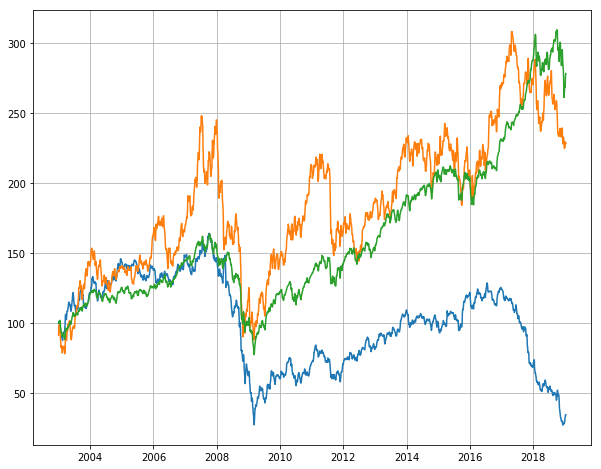

In [12]:
#%matplotlib notebook
#normalized.rolling(ma).mean().plot()
plt.figure(figsize=(10,8), num=3)
plt.plot(normalized.rolling(ma).mean());
plt.grid(True)

#### Or calculate/visualize normalized price difference to referece index

You have to specify to tickers to assess performance difference

In [13]:
print('Available tickers:',ticker)

Available tickers: ['GE', 'SIE', 'DJI']


In [14]:
ticker1=ticker[0]
ticker2=ticker[-1]
print('Comparison is done for',ticker1,'related to',ticker2)

Comparison is done for GE related to DJI


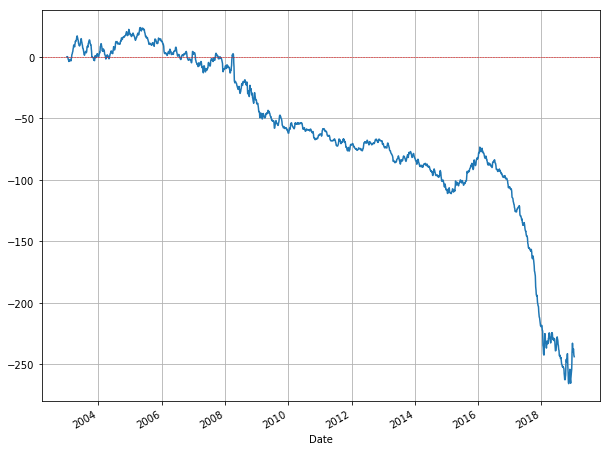

In [15]:
#%matplotlib notebook
plt.figure(figsize=(10,8), num=4)
ax=normalized[ticker1].sub(normalized[ticker2]).rolling(ma).mean().plot()
ax.axhline(y=0, color='red', linestyle='--', linewidth=0.5);
plt.grid(True)